<h2><center>Networks</center></h2>

<h2>Summary:</h2>
<p> This Jupyter notebook is a detailed description of project, which consist of generating Directed graph from the available dataset and it involves different tasks as described in the coursework given such as calculating in degree and out degrees, weakly connected components, binomial distribution along with visualization of data using relevant libraries. </p>

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In the below three cells, we are importing python libraries that are necessary to perform all the tasks mentioned in the coursework.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

<p>Here we check whether the dataset that we needed is present in the directory or not<p>

In [2]:
def check_datasets_presence():
    if not os.path.exists(os.path.join(os.getcwd(),"flight routes.txt")):
        print('File is not present in the current directory.')
    else:
        print('Data file is present in the current directory. Proceeding with further tasks.')

check_datasets_presence()

Data file is present in the current directory. Proceeding with further tasks.


The data set has been taken up from https://icon.colorado.edu/#!/ and is named as FAA Preffered Routes. This network was constructed from the USA's FAA (Federal Aviation Administration) National Flight Data Center (NFDC), Preferred Routes Database. Nodes in this network represent airports or service centers and links are created from strings of preferred routes recommended by the NFDC. The network used is Unipartite, directed, Unweighted with no multiple edges.<br>
The function of the network is to give visuals of the airports and routes being followed by different flights

Here we construct the graph using a variable named as Graph. The graph obtained is directed created using create_using attribute of NetworkX library

In [3]:
Graph = nx.read_adjlist('flight routes.txt', create_using=nx.DiGraph)

N represent number of nodes & E represent number of edges which comes out to be 1226 and 2615 respectively

In [4]:
N = Graph.number_of_nodes()
E = Graph.number_of_edges()
N,E

(1226, 2615)

In the below cell we create a dictionary of total degrees, in degrees and out degrees of the network in use

In [5]:
total_degree_profile= dict(Graph.degree()) #Creating a dictionary of total degree of the network
in_degree_profile = dict(Graph.in_degree()) #Creating a dictionary of indegree of the network
out_degree_profile = dict(Graph.out_degree()) #Creating a dictionary of outdegree of the network

In the below three cells, the average total degree, average in degree and average out degree are calculated along with their visualization in barplot using matplotlib library

In [6]:
total_degree_average=sum(total_degree_profile.values())/N #Calculating the average of total degree distribution
in_degree_average=sum(in_degree_profile.values())/N #Calculating the a verage of indegree distribution
out_degree_average=sum(out_degree_profile.values())/N #Calculating the average of outdegree distribution

In [7]:
total_degree_average, in_degree_average, out_degree_average

(4.265905383360522, 2.132952691680261, 2.132952691680261)

<BarContainer object of 3 artists>

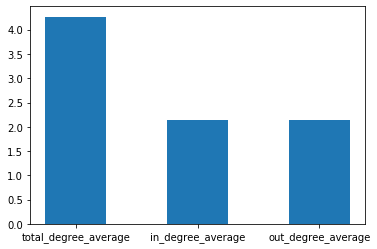

In [8]:
X=list(['total_degree_average','in_degree_average','out_degree_average'])
Y=list([total_degree_average, in_degree_average, out_degree_average])
plt.bar(X,Y, width=0.5) #Plotting the average values of total degree, indegree and out degree

It turns out to be that in degree average and out degree average is same because the number of links or edges remain same throughout the network i.e. L = in_degree + out_degree where L denotes total number of links.
Following mathematical equation visualize this:



For a node $i$ in a directed network, its degree is the sum of in degree and out degree
$$\therefore  k_{i}=k_{i}^{\text {in }}+k_{i}^{\text {out }}$$

And $L$, is the total number of links in a directed network 
$$
L=\sum_{i=1}^{N} k_{i}^{i n}=\sum_{i=1}^{N} k_{i}^{o u t}
$$
Fox a directed link between node $i$ and node $j$, it constitutes an incoming degree for one node, but an outgoing degree for the other.
Calculating average in degree $\left\langle k_{i n}\right\rangle \&$ avergec out degree $\left\langle k_{\text {out }}\right\rangle$
$$
\begin{aligned}
&\left\langle k_{\text {in }}\right\rangle=\frac{1}{N} \sum_{i=1}^{N} k_{i}^{\text {in }}=\frac{L}{N} \\
&\left\langle k_{\text {out }}\right\rangle=\frac{1}{N} \sum_{L=1}^{N} k_{i}^{\text {out }}=\frac{L}{N}
\end{aligned}
$$
Since $\left\langle k_{i n}\right\rangle=\left\langle k_{\text {out }}\right\rangle$
$\therefore$ Average in degree \& average out degree is same


https://netsci.hongtaoh.com/degree-average-degree-and-degree-distribution-ch-2-3.html

In the below cell we create a list of values from the dictionary created above of total degree, in degree and out degree

In [9]:
total_degree_profile_values = list(total_degree_profile.values())  #Creating a list of total degree values
in_degree_profile_values = list(in_degree_profile.values()) #Creating a list of in degree values
out_degree_profile_values = list(out_degree_profile.values()) #Creating a list of out degree values

In [10]:
#Printing unique total degree values
total_degree_unique=np.unique(total_degree_profile_values)
total_degree_unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 33, 37])

In the cells below we calculate the frequency of occurence of different degrees in total degree, in degree and out degree and then using these values, we plot the values in a bar plot using matplotlib library

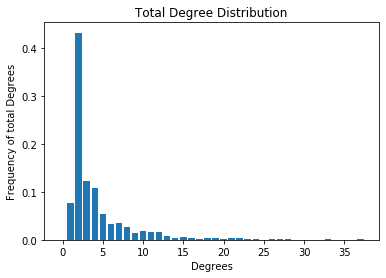

In [11]:
d = np.zeros(N) #Creating an array of N number of zeros
for i in range(N):
    d[i] = total_degree_profile_values.count(i)/N #Storing percentage of occurence of different degrees in 'd' array
degree_interval = list(range(0,38)) #Creating a degree interval
plt.bar(degree_interval,d[0:38],align = 'center') #Plotting the total degree distribution
plt.xlabel("Degrees")
plt.ylabel("Frequency of total Degrees")
plt.title("Total Degree Distribution")
plt.show()

In [12]:
#Printing unique in degree values
in_degree_unique=np.unique(in_degree_profile_values)
in_degree_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 20])

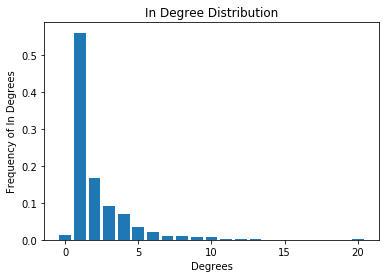

In [13]:
e = np.zeros(N) #Creating an array of N number of zeros
for j in range(N):
    e[j] = in_degree_profile_values.count(j)/N #Storing percentage of occurence of different degrees in 'e' array
degree_interval = list(range(0,21)) #Creating a degree interval
plt.bar(degree_interval,e[0:21],align = 'center') #Plotting the in degree distribution
plt.xlabel("Degrees")
plt.ylabel("Frequency of In Degrees")
plt.title("In Degree Distribution")
plt.show()

In [14]:
#Printing unique out degree values
out_degree_unique=np.unique(out_degree_profile_values)
out_degree_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       18, 20, 22, 24])

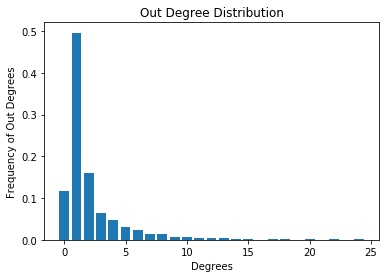

In [15]:
f = np.zeros(N) #Creating an array of N number of zeros
for k in range(N):
    f[k] = out_degree_profile_values.count(k)/N #Storing percentage of occurence of different degrees in 'f' array
degree_interval = list(range(0,25)) #Creating a degree interval
plt.bar(degree_interval,f[0:25],align = 'center') #Plotting the in degree distribution
plt.xlabel("Degrees")
plt.ylabel("Frequency of Out Degrees")
plt.title("Out Degree Distribution")
plt.show()

From the above plots, it can be inferred that a node 2 in total degree distribution and node 1 in both in degree and out degree distributions is a hub connecting the most number of flights which is usually the international airports or airports which are situated in metropolitan areas.

<h4>Question 1c)<h4>

In the cell below we find the number of weakly connected components which turns out to be 1. It shows that the network we using is having all its nodes connected to each other i.e. all the airports have one or more flights connecting one another

In [16]:
nx.number_weakly_connected_components(Graph)

1

In the below cell we find the number of nodes in weakly connected component which turns out to be 1226 which is equal to the number of nodes 'N'

In [17]:
for k in nx.weakly_connected_components(Graph):
        number_nodes_weakly=Graph.subgraph(k)
        
len(number_nodes_weakly)

1226

Since there is only one weakly connected component, it is inferred from the result that every node is accessible from any other node. In other words, every airport can be accessed by any other airport through different routes followed.

Since, we have only one weakly connected component, that component will also be the largest weakly connected component having 1226 nodes, same as wealy connecetd component and total number of nodes

In [18]:
largest = max(nx.weakly_connected_components(Graph),key=len) #Generating the largest weakly connected component
len(largest) #Finding the total number of nodes in the largest weakly connected component

1226

We are asked to calculate the distances in the giant component or largest weakly connected component.
For this we are taking a variable named as Giant_component to store weakly connected component sorted in reverse order

In [19]:
Giant_component = sorted(nx.weakly_connected_components(Graph), key=len, reverse=True)

Here Giant_component[0] represent the largest weakly connected component or giant component which is then stored in a object named Giant_comp_G and is visually displayed showing all the nodes in the component. In additon to it, we are also generating a dictionary of all the shortest paths out of the giant component that flights can follow from each node to move from one node to another node

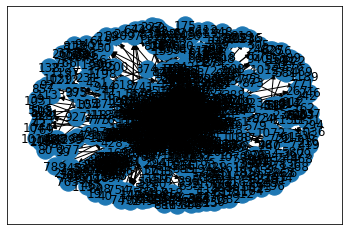

In [20]:
Giant_component[0]
Giant_comp_G = Graph.subgraph(Giant_component[0])
nx.draw_networkx(Giant_comp_G)

A list of all the distances is created out of dictionary in the cell below

In [21]:
distance = dict(nx.all_pairs_shortest_path_length(Giant_comp_G)) #Dictionary of distances
distance_list=[] #A list to store all values of dictionary created above
for node1 in distance:
    for node2 in distance[node1]:
        distance_list.append(distance[node1][node2])

In the cell below, The average distance is being calculated

To characterise a network as a small world network, we need to prove that increase in average distance is less than logarithmic distance with increase in number of nodes.
In cell 30 and 31 we calculate the average distance and logarithmic distance with given number of nodes
In cell 32 and 33 we calculate the average distance and logarithmic distance by increasing the number of nodes by 50

The two cells below show the percentage decrease and percentage increase in average distance and logarithimic distance.
Average distance percent is denoted by variable Percentage_avg and Logarithimic distance percent is denoted by variable Percentage_log.<br>
Since the percentage increase in logarithmic distance is more, we can say that the network in use is small world network

In [22]:
Graph_distance=nx.average_shortest_path_length(Graph)
Graph_log=math.log(N)
Graph_distance,Graph_log

(5.218194892965343, 7.111512116496157)

In [23]:
Graph_cluster=nx.average_clustering(Graph)
Graph_cluster

0.040446962184873675

In real network $G(N,L)$ high clustering coefficient is observed

Using the definition of small world property, we know that to prove a network exhibit small world property should have its logarithm of number of nodes as either same or lesser than the average distance.<br>
The above two values shows that logarithm of number of nodes is greater than the average distance which proves that th enetwork do not possess small world property
    

Since our network is $G(N,L)$ it exhibit high clustering and do not show small world property which is exhibited in $G(N,p)$

High clustering and the small-world property, which offers a challenge– the first is observed in regular networks, but not in ER models, while the second can be observed in ER networks, but not in regular ones.

In the cell below, we check whether the graph is strongly connected or not before computing the diameter

In [24]:
nx.is_strongly_connected(Graph)

False

Since the graph is not strongly connected, diameter comes out to be infinite which is shown as error in jupyter notebook

In the below cell, we calculate and plot the binomial distribution considering the total degree distribution.<br>
Here, n represent total number of nodes.<br>
p represent the probability of occurence of a particular degree<br>
k_min represent the minimum degree and k_max represent the maximum degree in the total degree calculations

$n=N$\
$k=k_{i} \quad$ where $k_{i}=\left[k_{1}, k_{2} \ldots .\right]$\
p.m.f. of $k_{i}$ is given by
$$
p\left(k_{i} \mid n_{1} p\right)=\left(\begin{array}{c}
n \\
k_{i}
\end{array}\right) p^{k_{i}}(1-p)^{n-k_{i}}
$$
The likelihood function is
$$
\mathbb{L}(p)=\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array}\right) p^{k_{i}}(1-p)^{n-k_{i}}
$$
$$=\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array}\right) \cdot \prod_{i=1}^{N} p^{k_{i}} \cdot \prod_{l=1}^{N}(1-p)^{n-k_{i}}$$
$$
=\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array}\right) \cdot p^{\sum_{i=1}^{N} k_{i}} \cdot(1-p)^{\sum_{i=1}^{N}\left(n-k_{i}\right)}
$$
$$=\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array}\right) \cdot p^{\sum_{i=1}^{N} k_{i}} \cdot(1-p)^{n-\sum_{i=1}^{N} k_{i}}$$
Taking $\log$ of likelihood function
$$
\begin{aligned}
\log \mathcal{L}(p) &=\log \left[\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array}\right) p^{\sum_{i=1}^{N} k_{i}}(1-p)^{n-\sum_{i=1}^{N} k_{i}}\right] \\
&=\log \left(\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array} \right)+\left(\sum_{i=1}^{N} k_{i}\right) \log p+\left(n-\sum_{i=1}^{N} k_{i}\right) \log (1-p)\right.
\end{aligned}
$$
Partially Differenting $\log$ likelihood function w.r.t. $p$ \& then equating to zero
$$
\begin{aligned}
\frac{\partial}{\partial p}\mathcal{L}(p) &=\frac{\partial}{\partial p}\left[\operatorname { log } \left(\prod_{i=1}^{N}\left(\begin{array}{l}
n \\
k_{i}
\end{array} \right)+\left(\sum_{i=1}^{N} k_{i}\right) \log p+\left(n-\sum_{i=1}^{N} k_{i}\right) \log (1-p)\right.\right.\\
&=0+\frac{1}{p} \sum_{i=1}^{N} k_{i}-\frac{1}{(1-p)}\left(n-\sum_{i=1}^{N} k_{i}\right)
\end{aligned}
$$

To find Maximum likelihood expression $(\hat{p})$ we equate the derivative obtained above to zero

$$
\begin{aligned}
&\left.\frac{\partial}{\partial p}\mathcal {L}(p)\right)=0 \\
&\frac{1}{p} \sum_{i=1}^{N} k_{i}=-\frac{1}{(1-p)}\left(n-\sum_{i=1}^{N} k_{i}\right)=0 \\
&\frac{1}{p} \sum_{i=1}^{N} k_{i}=\frac{1}{1-p}\left(n-\sum_{i=1}^{N} k_{i}\right)
\end{aligned}
$$
Here we denote $p$ as $\hat{p}$
$$
\begin{aligned}
\frac{1}{\hat{p}} \sum_{i=1}^{N} k_{i} &=\frac{1}{1-\hat{p}}\left(n-\sum_{i=1}^{N} k_{i}\right) \\
\frac{1-\hat{p}}{\hat{p}}=\frac{n-\sum_{i=1}^{N} k_{i}}{\sum_{i=1}^{n} k_{i}} \\
\frac{1}{\hat{p}}-1=\frac{n}{\sum_{i=1}^{n} k_{i}}-1 \\
\hat{p}=\frac{1}{n} \sum_{i=1}^{N} k_{i}
\end{aligned}
$$
$$
\therefore \hat{p}=\frac{\bar{k}_{N}}{N} \text { where } n=N
$$



https://stats.stackexchange.com/questions/181035/how-to-derive-the-likelihood-function-for-binomial-distribution-for-parameter-es

Using the above expression , we calculate the value of probability 'p' to be used in binomial distribution<br>
Therefore, p= 4.265/1226 which comes out to be equal to 0.003

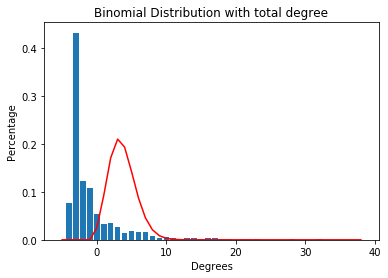

In [25]:
n=N 
p=0.003
k_min=-5 #Minimum Range of binomial distribution
k_max=38 #Maximum Range of binomial distribution
x=list(range(k_min,k_max+1))
dist = st.binom.pmf(x, n, p) #Calculating Probability mass fucntion of binomial distribution
plt.bar(x,d[0:44]) #Plotting total degree distribution
plt.plot(x,dist, color='red') #Plotting binomial distribution
plt.xlabel("Degrees")
plt.ylabel("Percentage")
plt.title("Binomial Distribution with total degree")

plt.show()

By definition, a binomial distribution means a frequency distribution of the possible number of successful outcomes in a given number of trials in each of which there is the same probability of success.<br>
<br>
By above plot, we can say that maximum probability of occurence of degrees occur between dgrees 0 to 10

In statistics, a power law is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities: one quantity varies as a power of another.

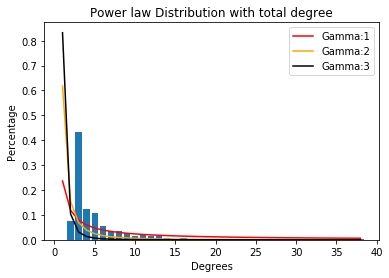

In [26]:
n1=N
k_min1=1 #Minimum degree of the network, O can't be taken as negative zero as exponent cannot be raised to power
k_max1=38 #Maximum degree of the network
gamma=1
def power(degree, minimum_degree, maximum_degree, exponent):
    normalisation=0
    for n in range(minimum_degree,maximum_degree+1):
        normalisation+= n**(-exponent)
    return (degree ** (-exponent))/normalisation

x1=list(range(k_min1,k_max1+1))
y1=[power(k,k_min1,k_max1,gamma) for k in x1] 
y2=[power(k,k_min1,k_max1,gamma+1) for k in x1] 
y3=[power(k,k_min1,k_max1,gamma+2) for k in x1] 
plt.bar(x1,d[0:38]) #Plotting total degree distribution
plt.plot(x1,y1, color='red', label='Gamma:1') #Plotting power law distribution with gamma value 1
plt.plot(x1,y2, color='orange',label='Gamma:2') #Plotting power law distribution with gamma value 2
plt.plot(x1,y3, color='black', label='Gamma:3') #Plotting power law distribution with gamma value 3
plt.xlabel("Degrees")
plt.ylabel("Percentage")
plt.title("Power law Distribution with total degree")
plt.legend()
plt.show()

Plotting the power law distribution above with three different gamma values equal to 1,2 and 3.<br>


From the above analysis of binomial distribution and power law distribution, it can be said that power law distribution is more appropriate

To calculate page rank, we are using a variable 'P' to store a dictionary and then creating a list of values out of the dictionary created denoted by P_list

In [27]:
P=nx.pagerank(Graph, alpha=0.85)
P_list=list(P.values())

Here alpha value of 0.85 is used as it is widely used as being promoted by Google searches as it gives the best results

To calculate closeness, we are using a variable 'C' to store a dictionary and then creating a list of values out of the dictionary created denoted by C_list

In [28]:
C=nx.closeness_centrality(Graph)
C_list=list(C.values())

Calculating the size of the the Pagerank list and closeness centrality list and is 1226 and 1226 respectively

In [29]:
len(P_list),len(C_list)

(1226, 1226)

Ploting the Page rank using seaborn library

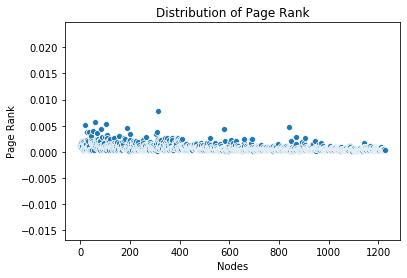

In [30]:
page_interval=list(range(len(P_list)))
sns.scatterplot(page_interval,P_list)
plt.xlabel("Nodes")
plt.ylabel("Page Rank")
plt.title("Distribution of Page Rank")
plt.show()

The PageRank algorithm measures the importance of each node within the network, based on the number incoming relationships and the importance of the corresponding source nodes. The underlying assumption roughly speaking is that a page is only as important as the pages that link to it.
PageRank is introduced in the original Google paper as a function that solves the following equation:
$$
P R(A)=(1-d)+d\left(\frac{P R\left(T_{1}\right)}{C\left(T_{1}\right)}+\ldots+\frac{P R\left(T_{n}\right)}{C\left(T_{n}\right)}\right)
$$
where,
- we assume that a page $A$ has pages $T_{1}$ to $T_{n}$ which point to it.
- $d$ is a damping factor which can be set between 0 (inclusive) and 1 (exclusive). It is usually set to $0.85 .$
- $C(A)$ is defined as the number of links going out of page $A$.
This equation is used to iteratively update a candidate solution and arrive at an approximate solution to the same equation.
<br>
<br>


https://neo4j.com/docs/graph-data-science/current/algorithms/page-rank/

<br>
Page rank is a quantity used to rank nodes according to their importance which in above plot shows that most values lies between 0.000 to 0.002 which shows the majority of flight routes are important or majority of flights are satisfying important routes<br>

Ploting the Closeness Centrality using seaborn library

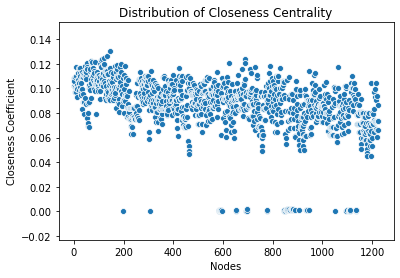

In [31]:
close_interval=list(range(len(C_list)))
sns.scatterplot(close_interval,C_list)
plt.xlabel("Nodes")
plt.ylabel("Closeness Coefficient")
plt.title("Distribution of Closeness Centrality")
plt.show()


Closeness centrality measures each node’s position in the network via a different perspective from the other network metrics, capturing the average distance between each vertex and every other vertex in the network. Assuming that nodes can only pass messages to or influence their existing connections, a low closeness centrality means that a node is directly connected or “just a hop away” from most others in the network. In contrast, nodes in very peripheral locations may have high closeness centrality scores, indicating the high number of hops or connections they need to take to connect to distant others in the network. 
<br>
https://www.sciencedirect.com/topics/computer-science/closeness-centrality

The plot above shows that majority of nodes have low closeness centrality indicating that the nodes or airports are not much far away from one another and two or more airports can be accessed by taking less number of flight routes

The two quantities i.e. Page Rank and Closeness centrality tell us that majority of the flight routes are important whether in terms of passenger movement or cargo movement or any other reason.

Calculating the values of Assortative mixing by degree, Assortative mixing by closeness and Assortative mixing by clustering.

In [32]:
print("Assortative mixing by Degree: ", nx.degree_assortativity_coefficient(Graph))
nx.set_node_attributes(Graph, C, 'closeness')
print("Assortative mixing by Closeness: ", nx.attribute_assortativity_coefficient(Graph, 'closeness'))
clustering_coefficient = nx.clustering(Graph)
nx.set_node_attributes(Graph, clustering_coefficient, 'clustering_coefficient')
print("Assortative mixing by Clustering: ", nx.attribute_assortativity_coefficient(Graph, 'clustering_coefficient'))

Assortative mixing by Degree:  0.008505675651479189
Assortative mixing by Closeness:  0.0016511960733441053
Assortative mixing by Clustering:  0.11648433007745701


Assortative mixing by node degree (i.e., the number of connections of a node) is the tendency of nodes to be connected to other nodes of similar degree and an important concept in network analysis. The value comes out to be 0.0085 which shows that tendency of a node $i$ with a degree $k$ to be connected to node $j$ with similar degree is quite less
<br>
In networks with scale-free distribution high values of assortative mixing by degree can be an indication of a hub-like core in networks. Degree correlation has generally been used to measure assortative mixing of a network. Degree correlation is a normalized metric and obtains values between −1 and 1. A high degree assortativity is a measure of preferential attachment in organizations, where highly connected vertices are connected with each other and a large number of vertices with low degree make up the remainder of the network.
<br>
<br>
<br>
<br>
Lourens J. Waldorp, Verena D. Schmittmann. "Computing Assortative Mixing by Degree with the $s$-Metric
in Networks Using Linear Programming." Journal of Applied Mathematics, 2015(none) 1-9 2015.
https://doi.org/10.1155/2015/58036
<br>https://ona-book.org/similarity.html


By Assortative mixing by Closeness it is meant that a node $i$ with a closeness coefficient $c$ to be connected to node $j$ with similar closeness coefficient is also less but slighly greater than Assortative mixing by Degree
<br>
Similarly, Assortative mixing by Clustering means a node $i$ with a clustering coefficient $C_{i}$ to be connected to node $j$ with similar clustering coefficient. The value obtained above i.e. 0.116 shows that around 11.6% nodes can have connections with similar clustering coefficirnts.

The three values infer that although all the nodes are conncted to one another by one or more than one connections, they do not exhibit similar properties.

Here, we create 10 random networks of different number of nodes with fixed number of edges<br>
By generating 10 random networks, we calculate the quantities Clustering coefficient and small world property to represent the networks created so far do not fall under category of real networks.

In [33]:
n2=[50,100,150,200,250,300,350,400,450,500] #Creating a list of nodes
m2=2000 #Fixed number of edges

In [34]:
log_number=[] #List to store log of number of nodes
Average_path_length2=[] # list to store Average path length of 10 graphs to be generated
cluster=[] #list to store Clustering coefficients
for s in range(len(n2)):
    
    Graph2=nx.gnm_random_graph(n2[s],m2 ,seed=210260735, directed=False) #Generating random graphs
    cluster.append(nx.average_clustering(Graph2)) #Generating average clustering coefficients
    log_number.append(math.log(n2[s])) # Logarithm of number nodes
    Average_path_length2.append(nx.average_shortest_path_length(Graph2)) #Calculating average distance

Plotting the values of clustering coefficient and average distance below

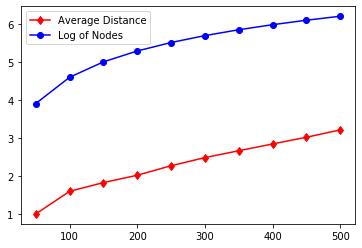

In [35]:
plt.plot(n2,Average_path_length2, color="red", marker='d', label='Average Distance')
plt.plot(n2,log_number, color="blue",marker='o', label='Log of Nodes')
plt.legend()

According to conditions of small world property, The logarithm of nodes should come out to be equal or less than average distance but in our case, it comes out to be opposite, which proves that the networks generated are not real networks

Plotting the average clustering coeffcients below. It shows with increase in number of nodes, the clustering coefficient decreases 

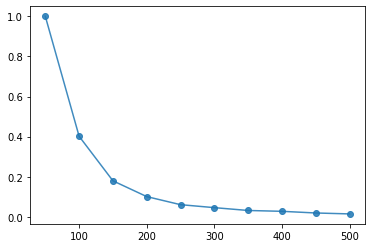

In [36]:
plt.plot(n2, cluster, alpha=0.85, marker="o")
plt.show()

To verify that increase in average distance is less than logarithmic of number of nodes, we use following operations.<br>


In [37]:
log_increase=((log_number[9]-log_number[0])*100)/log_number[0]
log_increase

58.85919100677789

In [38]:
dist_increase=((Average_path_length2[9]-Average_path_length2[0])*100)/Average_path_length2[0]
dist_increase

221.68737474949899

It shows that increase in logarithm of number of nodes is by 194% in comparison to 59% increase in average distance which proves that the networks created do not possess small world property. Hence, the networks are not real networks

In this task, we are generating 10 random graphs with 10 equally spaced probabilities $p_{r}$  

This task also include calculating the number of connected components and then calculating the respective component sizes
<br>
To plot component size, we calculate average component size of all the components of 10 random graphs

In [39]:
Number_of_connected_components = list()
probability_list = list(np.linspace(0, 0.002, num=10)) #Creating a list of 10 evenly spaced probability values between given points
Average_Component_size = list()
for l in probability_list:
    GNP_graph = nx.gnp_random_graph(1000, l,seed=210260735)
    Number_of_connected_components.append(nx.number_connected_components(GNP_graph)) #Appending the number of connected components
    Connected_component_size = [size for size in nx.connected_components(GNP_graph)] # Calculating sizes of connected components
    Average_Component_size.append(np.mean([len(Connected_component_size[avg]) for avg in range(len(Connected_component_size))]))

In [40]:
Average_Component_size

[1.0,
 1.1273957158962795,
 1.3157894736842106,
 1.5174506828528074,
 1.8416206261510129,
 2.358490566037736,
 3.0864197530864197,
 4.016064257028113,
 5.747126436781609,
 7.092198581560283]

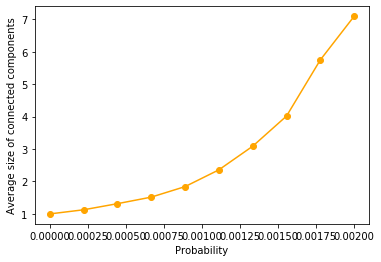

In [41]:
plt.plot(probability_list,Average_Component_size,color='orange', marker='o')
plt.xlabel('Probability')
plt.ylabel('Average size of connected components')
plt.show()

Looking at the values of average component size and its plots, we see that for last two average component size, there is an increase more than the other average componet sizes

In this task, we generate 100 graphs for a particular number of nodes. Therefore, using 10 different number of nodes, we generate 1000 networks using Barabasi-Albert model
<br>
Barabasi-Albert model is used for constructing a random network only by using preferential attachment. The networks resulting from this process can be shown to approximate strong scale_free networks in the limit of a large number of nodes.
<br> The construction starts with chossing a value of $M$ which is usually not larger than 10. Then the construction proceeds by discrete steps. In each step, a single new node is connected to $m$ nodes of the current network. 
<br>A node $i$ is chosen with
$$
\mathscr{P}(i)=\frac{k_{i}}{\sum_{j} k_{j}}
$$
<br>where the sum over j extends over all nodes already in the network



In [42]:
path_length =[] #Creating an empty list to store values of shortest paths of random networks to be generated further
Average_log = [] #Creating an empty list to store values of Log of number of nodes

Average_path_length=[] #Creating an empty list to store values of avaerage of path lengths to be calcualted considering 100 network path lenghths at once 
Number_of_nodes=[20,40,60,80,100,120,140,160,180,200] #Creating a list of different number of nodes
m=3
for p in range(len(Number_of_nodes)):
   
    Average_log.append(math.log(Number_of_nodes[p])) #Generating log of number of nodes
    
    for f in range(100):
        BAM_graph=nx.barabasi_albert_graph(Number_of_nodes[p],m, seed=210260735+p) #Generating random graphs using Brabasi-Albert model
    
        path_length.append(nx.average_shortest_path_length(BAM_graph)) #Appending the average of shortest path lengths taking average of 1000 networks
        
    Average_path_length.append(np.mean(path_length)) #Appending mean of 1000 networks considering 100 networks at once which generate 10 values at end


In [43]:
Average_path_length

[1.9157894736842107,
 2.0764844804318496,
 2.172458580174905,
 2.2504673528526977,
 2.318798124706401,
 2.3718042262375936,
 2.424209818349005,
 2.4670660596088383,
 2.511797184374006,
 2.540220481011982]

In [44]:
Average_log

[2.995732273553991,
 3.6888794541139363,
 4.0943445622221,
 4.382026634673881,
 4.605170185988092,
 4.787491742782046,
 4.941642422609304,
 5.075173815233827,
 5.19295685089021,
 5.298317366548036]

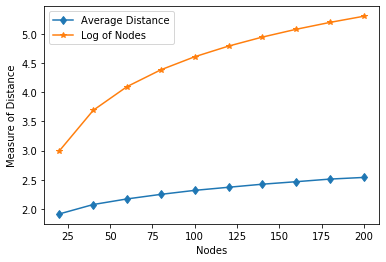

In [45]:
plt.plot(Number_of_nodes,Average_path_length, marker='d', label='Average Distance')
plt.plot(Number_of_nodes,Average_log, marker='*', label='Log of Nodes')
plt.xlabel("Nodes")
plt.ylabel("Measure of Distance")
plt.legend()
plt.show()

In this task, we generate a random graph with 100 nodes using Watts_Strogatz model with given values of $k$ and $p_{r}$.
It starts with a regular network and rewires its link with given value of $p$

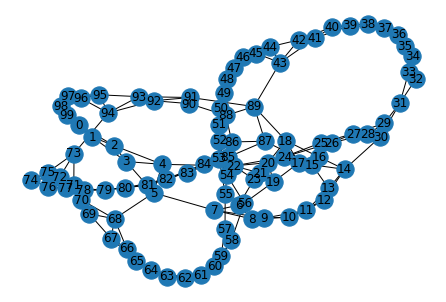

In [46]:
G1=nx.watts_strogatz_graph(100,4,0.05, seed=210260735)
nx.draw(G1, with_labels=True)

In [47]:
v2=[] # Creating an empty list to store
eccentricity={} #Creating a dictionary to store maximum of eccentricity values
eccentric_centrality={} # Creating a dictionary to store eccentricity centrality values which is calculated as 1/eccentricity values
s1=dict(nx.all_pairs_shortest_path_length(G1))
for k,n in s1.items():
    
    eccentricity[k]=max(n.values())
    eccentric_centrality[k]=1/eccentricity[k]
    

The <b>eccentricity</b> of a node $i$ in a network is the maximum distance from $i$ to any other node

<b>Eccentricity centrality</b> is a measure of the centrality of a node in a network based on having a small maximum distance from a node to every other reachable node (i.e. the graph eccentricities). This measure has found applications in social networks, transportation, biology, and the social sciences.

In [48]:
centrality_list=list(eccentric_centrality.values()) #Creating a list of eccentricity centrality values to be used for ploting  

In [49]:
closeness=nx.closeness_centrality(G1) #Calculating the closeness of the graph generated above and then creating a list of closeness values to be used for plotting
close_list=list(closeness.values())

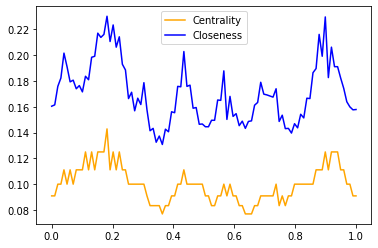

In [50]:
degree_int=list(np.linspace(0, 1, num=100)) #Creating a degree interval of equally spaced 100 points between 0 and 1
plt.plot(degree_int,centrality_list, color="orange", label='Centrality')
plt.plot(degree_int,close_list, color="blue", label='Closeness')
plt.legend()
plt.show()

The above plot of Closeness and Eccentricity Centrality shows that for certain Centrality measure, the closeness is hsowing the similar behaviour of increase or decrease. However, for certain points of Centrality, the closeness behaviour is different which may be due to the reason that certain nodes of the network are connected far from the given node $i$